# Renewable Energy
Data source: https://www.energy.gov.au/publications/australian-energy-update-2023
- Machine readable files: https://www.energy.gov.au/publications/australian-energy-statistics-2023-machine-readable-files

## Financial Year Data

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O FY - machine-readable.csv')
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Year'] = df['Year'].apply(lambda x: int(x[:4]))
df

,Jurisdiction,Year,Fuel,Unit,Quantity
4,AUS,1989,Geothermal,GWh,NaN
5,AUS,1989,Hydro,GWh,14880.000
6,AUS,1989,Large-scale solar PV,GWh,NaN
10,AUS,1989,Small-scale solar PV,GWh,NaN
14,AUS,1989,Wind,GWh,NaN
...,...,...,...,...,...
484,AUS,2021,Geothermal,GWh,NaN
485,AUS,2021,Hydro,GWh,17010.891
486,AUS,2021,Large-scale solar PV,GWh,12569.176
490,AUS,2021,Small-scale solar PV,GWh,22117.450


<Axes: xlabel='Year', ylabel='Quantity'>

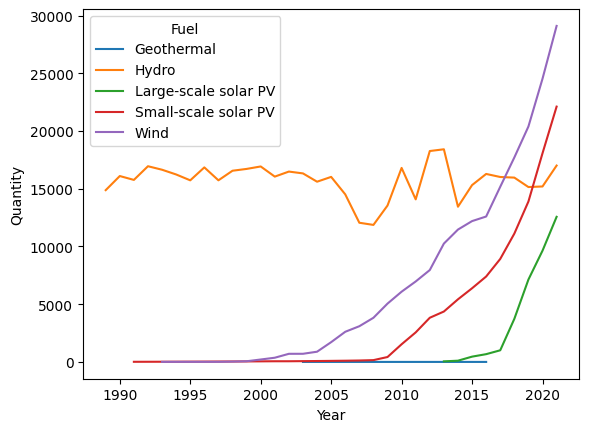

In [2]:
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

## Calendar Year Data

<Axes: xlabel='Year', ylabel='Quantity'>

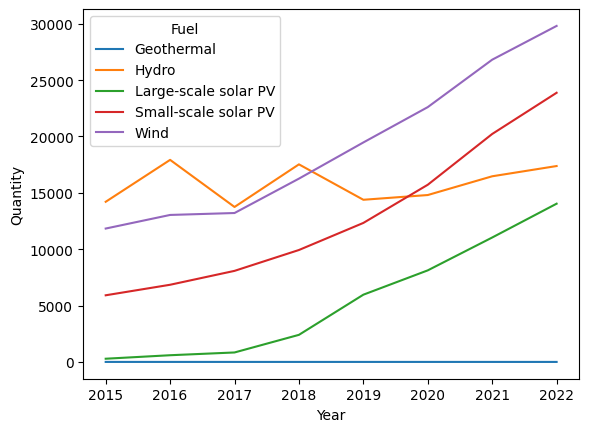

In [3]:
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O CY - machine-readable.csv')
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
# df['Year'] = df['Year'].apply(lambda x: int(x[:4]))
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
df_quarter = pd.DataFrame({'quarter': [datetime(2015, 1, 1) + relativedelta(months=n) for n in range(0, 85, 3)]})
df_quarter

,quarter
0,2015-01-01
1,2015-04-01
2,2015-07-01
3,2015-10-01
4,2016-01-01
5,2016-04-01
6,2016-07-01
7,2016-10-01
8,2017-01-01
9,2017-04-01


In [5]:
df_re = df.pivot(index='Year', columns='Fuel', values='Quantity').reset_index()
df_re['quarter'] = df_re['Year'].apply(lambda x: datetime(x, 1, 1))
df_re = df_re.drop(['Year', 'Geothermal'], axis=1)
df_re

Fuel,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,quarter
0,14207.568,283.510,5912.014,11833.002,2015-01-01
1,17926.422,593.913,6845.862,13039.705,2016-01-01
2,13747.718,838.930,8078.627,13210.790,2017-01-01
3,17528.331,2402.624,9929.921,16261.954,2018-01-01
4,14385.776,5964.995,12331.992,19471.688,2019-01-01
5,14806.551,8123.379,15719.282,22606.892,2020-01-01
6,16469.694,11037.793,20223.098,26813.938,2021-01-01
7,17379.090,14038.546,23878.935,29809.901,2022-01-01


# Transformed data
We don't have quarterly information for renewable energy. So I've interpolated the values.

In [6]:
df_req = pd.merge(df_quarter, df_re, how='left', on='quarter')
df_req = df_req.interpolate(method='linear', limit_direction='forward')
df_req['total_renewable'] = df_req.sum(axis=1, numeric_only=True)
df_req.to_csv('../data/transformed/renewable_energy.csv', index=False)
df_req

,quarter,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,total_renewable
0,2015-01-01,14207.56800,283.51000,5912.01400,11833.00200,32236.09400
1,2015-04-01,15137.28150,361.11075,6145.47600,12134.67775,33778.54600
2,2015-07-01,16066.99500,438.71150,6378.93800,12436.35350,35320.99800
3,2015-10-01,16996.70850,516.31225,6612.40000,12738.02925,36863.45000
4,2016-01-01,17926.42200,593.91300,6845.86200,13039.70500,38405.90200
5,2016-04-01,16881.74600,655.16725,7154.05325,13082.47625,37773.44275
6,2016-07-01,15837.07000,716.42150,7462.24450,13125.24750,37140.98350
7,2016-10-01,14792.39400,777.67575,7770.43575,13168.01875,36508.52425
8,2017-01-01,13747.71800,838.93000,8078.62700,13210.79000,35876.06500
9,2017-04-01,14692.87125,1229.85350,8541.45050,13973.58100,38437.75625


<Axes: xlabel='quarter', ylabel='quantity'>

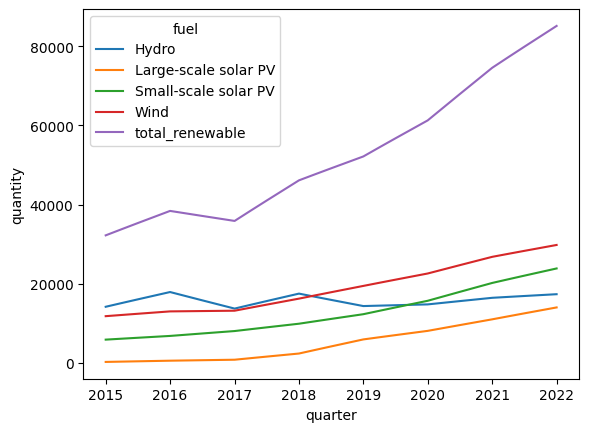

In [7]:
df_long = df_req.set_index('quarter').stack().reset_index()
df_long.columns = ['quarter', 'fuel', 'quantity']
df_long
sns.lineplot(data=df_long, x='quarter', y='quantity', hue='fuel')